In [49]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

hrv_middle_data_path = 'hrv-middle-data/'

res = pd.DataFrame([], columns=['Participant', 'RMSSD_diff', 'CVNN_diff', 'SDNN_diff'])

for p_index in range(80):
    participant_key = 'P' + str(p_index + 1).zfill(2)
    file_path = hrv_middle_data_path + participant_key + '_hrv_result.csv'

    if not os.path.isfile(file_path):
        print(file_path + ' do not exist!')
        continue

    df = pd.read_csv(file_path)
    df['RMSSD_diff'] = df['HRV_RMSSD_after'] - df['HRV_RMSSD_before']
    df['CVNN_diff'] = df['HRV_CVNN_after'] - df['HRV_CVNN_before']
    df['SDNN_diff'] = df['HRV_SDNN_after'] - df['HRV_SDNN_before']

    res.loc[len(res)] = [participant_key, df['RMSSD_diff'].mean(), df['CVNN_diff'].mean(), df['SDNN_diff'].mean()]

# res.to_csv('hrv_result.csv', index=False)


hrv-middle-data/P07_hrv_result.csv do not exist!
hrv-middle-data/P27_hrv_result.csv do not exist!
hrv-middle-data/P59_hrv_result.csv do not exist!
hrv-middle-data/P65_hrv_result.csv do not exist!


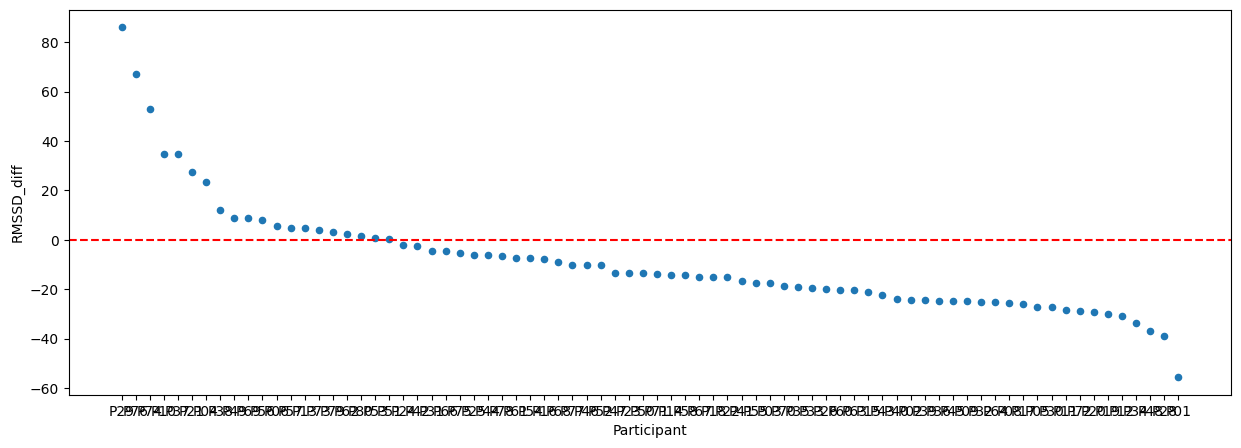

In [50]:
res.sort_values(by='RMSSD_diff', ascending=False, inplace=True)
plot = res.plot(x='Participant', y='RMSSD_diff', kind='scatter', figsize=(15, 5))

plot.axhline(0, color='red', linestyle='--', label='y=0 line')

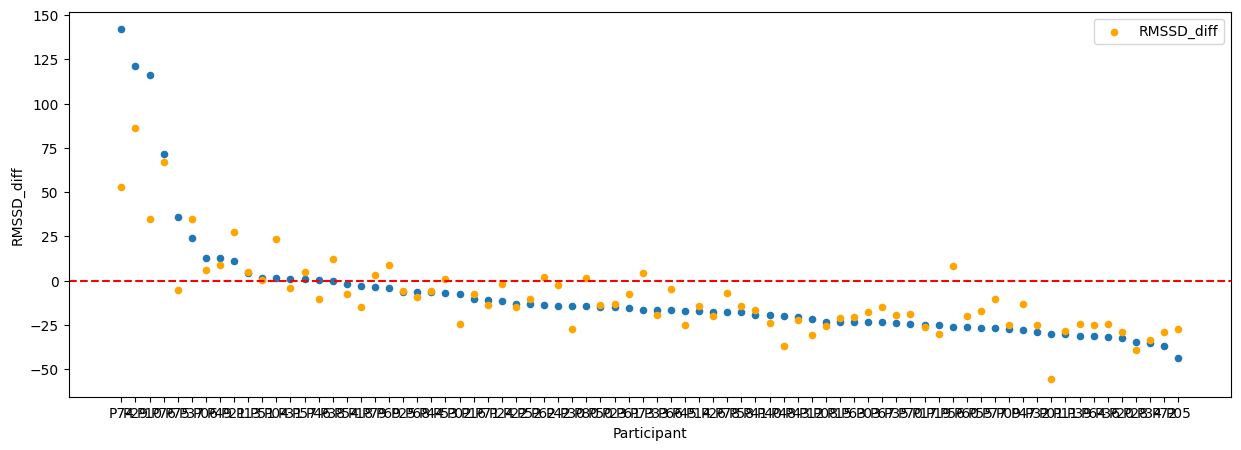

In [51]:
res['CVNN_diff'] = res['CVNN_diff'] * 1000
res.sort_values(by='CVNN_diff', ascending=False, inplace=True)
plot = res.plot(x='Participant', y='CVNN_diff', kind='scatter', figsize=(15, 5))

plot.axhline(0, color='red', linestyle='--', label='y=0 line')

res.plot(x='Participant', y='RMSSD_diff', kind='scatter', color='orange', label='RMSSD_diff', ax=plot)


plt.show()